In [1]:
import pandas as pd
import numpy as np
import sys
import pickle
import warnings
warnings.filterwarnings("ignore")

sys.path.insert(0, '..')
from DataModule.Data_Preparation import CoronnaCERTAINDataset
import FineTuneModule
import EvaluationModule

import xgboost as xgb
import sklearn
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.pipeline import Pipeline

(CVXPY) Jul 13 09:54:56 PM: Encountered unexpected exception importing solver CVXOPT:
ImportError("dlopen(/Users/gaskell/miniforge_x86_64/envs/ADPred_new/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so, 0x0002): tried: '/Users/gaskell/miniforge_x86_64/envs/ADPred_new/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e'))")
(CVXPY) Jul 13 09:54:56 PM: Encountered unexpected exception importing solver GLPK:
ImportError("dlopen(/Users/gaskell/miniforge_x86_64/envs/ADPred_new/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so, 0x0002): tried: '/Users/gaskell/miniforge_x86_64/envs/ADPred_new/lib/python3.10/site-packages/cvxopt/base.cpython-310-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64e'))")
(CVXPY) Jul 13 09:54:56 PM: Encountered unexpected exception importing solver GLPK_MI:
ImportError("dlopen(/Users/gaskell/miniforge_x86_64/e

In [2]:
dataset = CoronnaCERTAINDataset(
    library_root = '/Users/gaskell/Dropbox/Mac/Desktop/Autoimmune_Disease/Code/ML_RA_EHR/Dataset/',
    challenge = 'regression_delta_binary', #option: regression, regression_delta, classification, binary_classification, regression_delta_binary
    dataset = 'CORRONA CERTAIN', 
    process_approach = 'SC', #option: KVB, SC
    imputation = 'IterativeImputer', #option: SimpleFill, KNN, SoftImpute, BiScaler, NuclearNormMinimization, IterativeImputer, IterativeSVD, None(raw)
    patient_group = 'bionaive TNF', #option: "all", "bioexp nTNF", "bionaive TNF", "bionaive orencia", "KVB"
    drug_group = 'all', #option: "all", "actemra", "cimzia", "enbrel", "humira", "orencia", "remicade", "rituxan", "simponi"
    time_points = (0,3), 
    train_test_rate = 0.8,
    remove_low_DAS = True,
    save_csv = False, 
    random_state = 2022,
    verbose=False)
# read train, test from dataloader
train_set, train_loc = dataset.get_train()
test_set, test_loc = dataset.get_test()

aml = EvaluationModule.AutoBuild(seed=dataset.random_state, project_name="SC_Jul12_test", challenge=dataset.challenge)
# define models
if "regression" in dataset.challenge:
    model = RandomForestRegressor()
elif "classification" in dataset.challenge:
    model = FineTuneModule.fine_tune(train=train_set, model="drf_classification", search_methods="RandomSearch")
#                             model = RandomForestClassifier()
aml.validate("rf", model, train_set, test_set)
# aml.validation_output(dataset)
# aml.test_output(dataset)

In [3]:
aml.validation

,model,MAE,MSE,RMSE,R2,Pearson_Correlation,Accuracy,F1-Score
0,rf,0.909876,1.129790,1.062916,0.144939,0.395437,0.709677,0.562009
1,rf,0.957947,1.343587,1.159132,0.319712,0.581880,0.838710,0.456140
2,rf,0.946623,1.254399,1.119999,0.016888,0.260094,0.741935,0.523077
3,rf,0.780951,0.896376,0.946772,0.088434,0.376285,0.870968,0.465517
4,rf,1.089291,1.745868,1.321313,-0.023209,0.159025,0.733333,0.423077
5,rf,0.894936,1.302093,1.141093,0.185960,0.431977,0.766667,0.433962
6,rf,0.865040,1.200959,1.095883,0.190538,0.453397,0.800000,0.444444
7,rf,0.848110,1.047528,1.023488,0.013966,0.312436,0.766667,0.433962
8,rf,1.044725,1.622277,1.273687,0.293915,0.625919,0.666667,0.400000
9,rf,0.901613,1.091828,1.044906,0.388152,0.644176,0.700000,0.411765


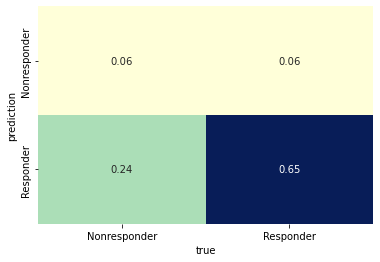

In [4]:
aml.confusion_matrix("rf")